In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-v0_8-poster")
%matplotlib inline

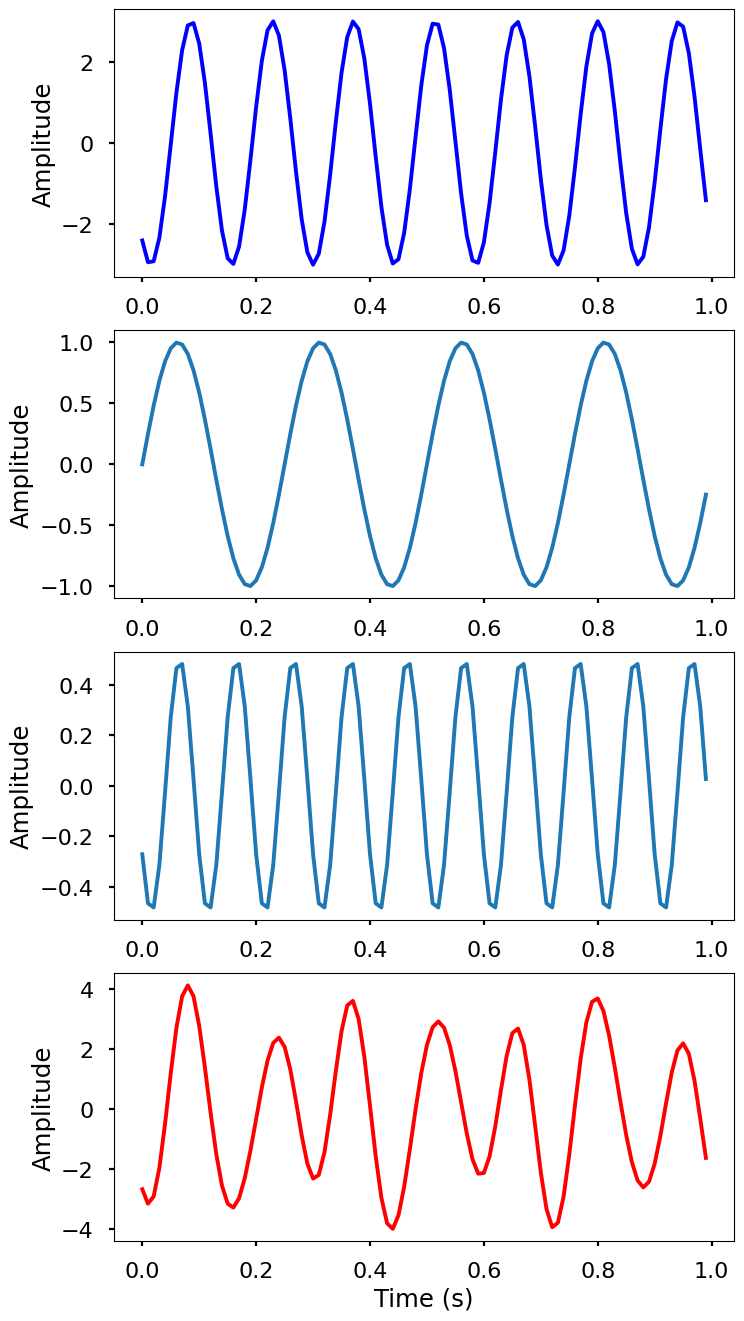

In [5]:
samples = 100
sampling_interval = 1/samples

time = np.arange(0,1,sampling_interval)

# frequenz muss echt kleiner als samples/2 sein
sin_1 = 3*np.sin(2*np.pi*7*time + 180)
sin_2 = np.sin(2*np.pi*4*time)
sin_3 = .5*np.sin(2*np.pi*10*time + 10)


plt.figure(figsize=(8,16))
plt.subplot(411)
plt.plot(time,sin_1, "b")
plt.ylabel("Amplitude")

plt.subplot(412)
plt.plot(time,sin_2)
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(time,sin_3)
plt.ylabel("Amplitude")

plt.subplot(414)
plt.plot(time,sin_2+sin_1+sin_3, "r")
plt.ylabel("Amplitude")

plt.xlabel("Time (s)")
plt.show()

In [6]:
def DFT(x):
    N = len(x)
    # ist die DFT über nur die frequenz k 
    # die gesamte DFT bildet ein array über alle frequenzen 0 bis N-1
    X = np.zeros(N, dtype=complex)
    # frequency index
    for k in range(N):
        X_k = 0
        # time/space index
        for n in range(N):
            X_k += x[n] * np.e ** ((-2j*np.pi*k*n)/N)
        X[k] = X_k        
    return X


$$\text{amp} = \frac{|X_k|}{N} = \frac{\sqrt{\left[\Re(X_k)\right]^2 + \left[\Im(X_k)\right]^2}}{N}$$


$$\text{phase} = \text{atan2}(\Im(X_k), \Re(X_k))$$

In [21]:
# AMPLITUDE
# Zusammengesetzte Funktion aus sin_1, sin_2 und sin_3
func = sin_1+sin_2+sin_3
X_k = 0
'''
Hier wird keine DFT über alle Frequenzen gemacht, sondern nur eine DFT 
über eine bestimmte Frequenz, die durch die Variable frequency bestinmt wird
'''
frequency = 1
#es wird über alle smples iteriert 
for n in range(N):
            # DFT
            X_k += func[n] * np.e ** ((-2j*np.pi*frequency*n)/N)
# gibt die Amplitude der Teilfunktion von func mit der frequenz requency aus 
# frage : laut der formel oben müsste die amplitude herauskommen, aber es ist nur die hälfte
# deshalb habe ich das Ergebnis noch mal 2 genommen
print(2 *(np.sqrt(X_k.real ** 2 + X_k.imag ** 2))/N )



3.0


In [40]:
# PHASE
# Zusammengesetzte Funktion aus sin_1, sin_2 und sin_3
func = sin_1+sin_2+sin_3
X_k = 0
'''
Hier wird keine DFT über alle Frequenzen gemacht, sondern nur eine DFT 
über eine bestimmte Frequenz, die durch die Variable frequency bestinmt wird
'''
N = samples
frequency = 1
#es wird über alle smples iteriert 
for n in range(N):
    X_k += func[n] * np.e ** ((-2j*np.pi*frequency*n)/N)
print(np.atan2(X_k.imag, X_k.real))

2.5000150721766827


In [27]:
np.atan2(np.inf,np.inf)

np.float64(0.7853981633974483)

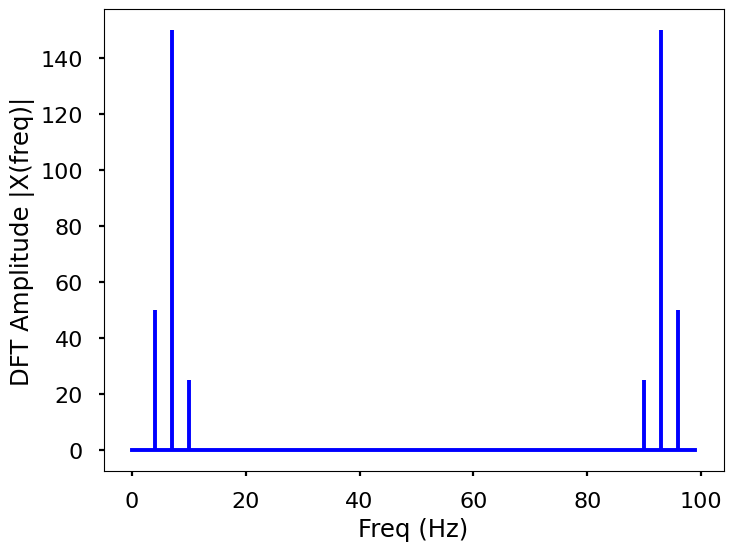

In [7]:
X = DFT(sin_2+sin_1+sin_3)

N = len(X)
n = np.arange(N)
T = N/samples
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.show()

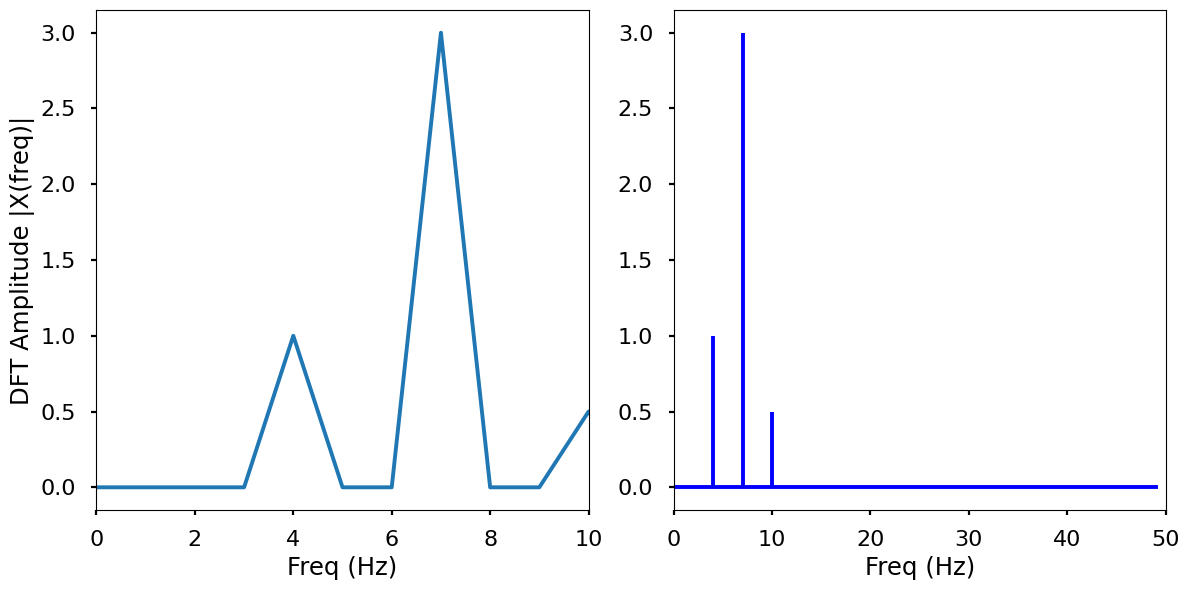

In [8]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plt.stem(f_oneside, abs(X_oneside), "b", markerfmt=" ", basefmt="-b")
plt.plot(f_oneside , abs(X_oneside))
plt.xlim(0,10)
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.xlim(0, 50)
plt.tight_layout()
plt.show()

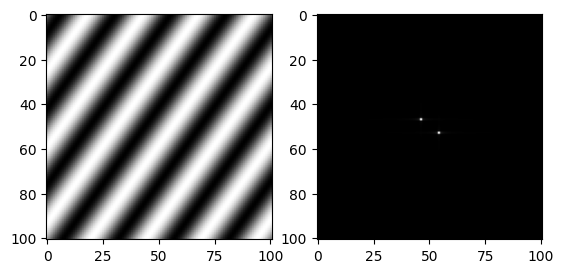

In [53]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-50, 51, 1)
X, Y = np.meshgrid(x, x)
wavelength = 20
angle = np.pi / 5
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
  # Note, order is reversed for y
plt.show()